In [12]:
import pandas as pd
import numpy as np
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
dataset = randn(25)

(-0.06, -0.04)

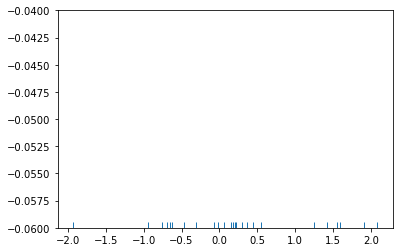

In [16]:
sns.rugplot(dataset)

plt.ylim(-0.06,-0.04)

<AxesSubplot:>

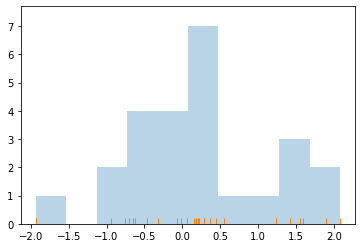

In [17]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

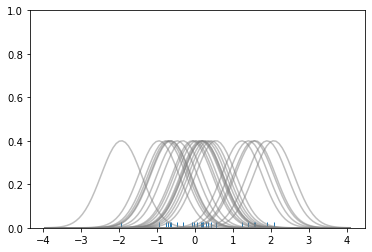

In [23]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3 * len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color = 'grey', alpha =0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of basis functions')

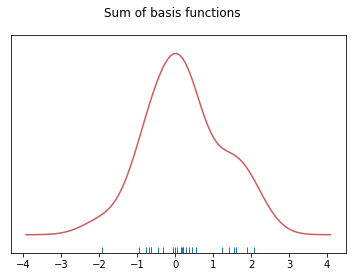

In [24]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of basis functions")


<AxesSubplot:ylabel='Density'>

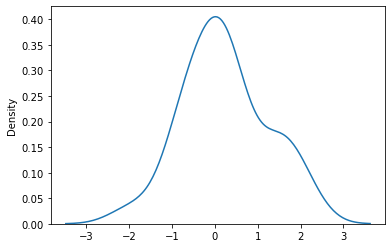

In [25]:
sns.kdeplot(dataset)

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

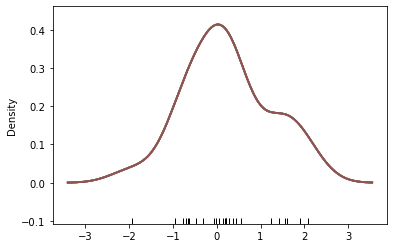

In [27]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)